In [121]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats 

# Pregunta de investigación número 3: 
## ¿Qué países han logrado manejar el problema de manera adecuada?


Para comenzar a responder esta pregunta importo los data sets correspondientes a esta investigación, los cuales se limpiaron el la sección pasada de esta fase:

#Pregunta de investigación número 4: 
## Hipótesis: ¿Está México consciente de la problemática que trae consigo este problema de salud?

In [219]:
#cargo mis archivos correspondientes al interés por búsqueda y al interés por tema
interes_tema = pd.read_csv('https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/Indice_Atencion/interes_mex_2013_2020_clean.csv', index_col=0)
interes_busqueda = pd.read_csv('https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/Indice_Atencion/interes_cancer_de_mama_busqueda_clean.csv', index_col=0)

#Será importante tener el año y el mes en una columna separada, entonces procedo a separar:

interes_busqueda['fecha'] = pd.to_datetime(interes_busqueda['fecha'])
interes_tema['fecha'] = pd.to_datetime(interes_tema['fecha'])

# agrego una columna que contenga el año
interes_tema['year'] = list(interes_tema.fecha.dt.year)
interes_busqueda['year'] = list(interes_busqueda.fecha.dt.year)

#agrego una columna que contenga el mes
interes_tema['mes'] = list(interes_tema.fecha.dt.month)
interes_busqueda['mes'] = list(interes_busqueda.fecha.dt.month)

#cargo los datos del 2013 al 2019: 
interes_tema = interes_tema[(interes_tema['year'] != 2012) & (interes_tema['year']<2020)]
interes_busqueda = interes_busqueda[interes_busqueda['year']<2020]

In [220]:
print(f"el promedio del interés por tema es: {interes_tema['interes_en_cancer'].mean()}")
print(f"la mediana del interés por tema es: {interes_tema['interes_en_cancer'].median()}")
print(f"la media truncada correspondiente es: {stats.trim_mean(interes_tema['interes_en_cancer'], 0.1)}")
print(f"su desviación estándar es de: {interes_tema['interes_en_cancer'].std()}")

el promedio del interés por tema es: 27.416666666666668
la mediana del interés por tema es: 21.0
la media truncada correspondiente es: 22.191176470588236
su desviación estándar es de: 20.294938732418245


In [221]:
print(f"el promedio de interés por búsqueda es: {interes_busqueda['interes_en_cancer'].mean()}")
print(f"la mediana de interés por búsqueda es: {interes_busqueda['interes_en_cancer'].median()}") 
print(f"la media truncada correspondiente es: {stats.trim_mean(interes_busqueda['interes_en_cancer'], 0.1)}")
print(f"su desviación estándar es de: {interes_busqueda['interes_en_cancer'].std()}")

el promedio de interés por búsqueda es: 20.285714285714285
la mediana de interés por búsqueda es: 15.0
la media truncada correspondiente es: 16.294117647058822
su desviación estándar es de: 18.18947890559658


- la diferencia entre la media truncada y la media también nos indica la presencia de outlayers en nuestro conjunto. 

- podemos ver que hay una dispersión grande entre los datos, ya que la desviación estándar es grande con respecto al rango de los valores en ambos casos, ya que van del 0 al 100. 


In [222]:
x = np.arange(0, 1.10, 0.10)

for i in range(len(x)):
  if i != 0: 
    print(f" el cuantil {round(x[i]*100, 1)} es: {interes_tema['interes_en_cancer'].quantile(x[i])}")

for i in range(len(x)):
  if i!=0:
    print(f"el cuantil {round(x[i]*100, 1)} es: {interes_busqueda['interes_en_cancer'].quantile(x[i])}")

 el cuantil 10.0 es: 16.3
 el cuantil 20.0 es: 18.0
 el cuantil 30.0 es: 19.0
 el cuantil 40.0 es: 20.0
 el cuantil 50.0 es: 21.0
 el cuantil 60.0 es: 23.0
 el cuantil 70.0 es: 24.0
 el cuantil 80.0 es: 28.0
 el cuantil 90.0 es: 32.0
 el cuantil 100.0 es: 100.0
el cuantil 10.0 es: 8.0
el cuantil 20.0 es: 10.200000000000003
el cuantil 30.0 es: 12.0
el cuantil 40.0 es: 13.0
el cuantil 50.0 es: 15.0
el cuantil 60.0 es: 17.800000000000004
el cuantil 70.0 es: 19.099999999999994
el cuantil 80.0 es: 23.0
el cuantil 90.0 es: 34.7
el cuantil 100.0 es: 100.0


- Con esto podemos ver que el índice de atención normalmente está por debajo del 30% de atención en búsqueda.

In [223]:
interes_tema['interes_en_cancer'].quantile(0.75) - interes_tema['interes_en_cancer'].quantile(0.25)

7.0

In [224]:
interes_busqueda['interes_en_cancer'].quantile(0.75) - interes_busqueda['interes_en_cancer'].quantile(0.25)

10.25

- Con esto podemos ver que la distancia entre los datos típicos dentro del DS no están tan distanciados entre sí y en realidad la atención que se le da a este problema sí está por debajo al 30% con respecto a los meses donde se focaliza la atención.

#### ahora me concentraré en visualizaciones:

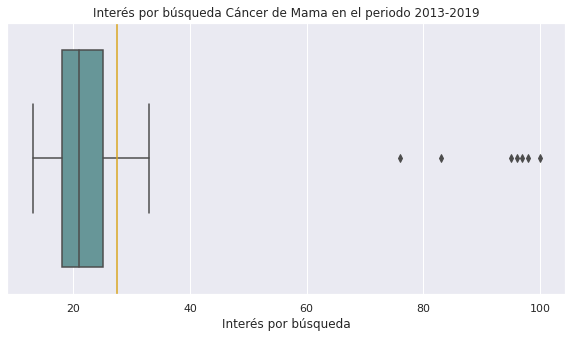

In [225]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_tema['interes_en_cancer'], color='cadetblue')
plt.axvline (interes_tema['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

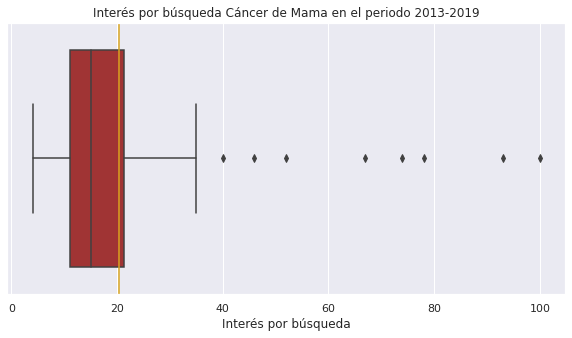

In [226]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_busqueda['interes_en_cancer'], color='firebrick')
plt.axvline (interes_busqueda['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

#### Como podemos ver, hay algunos outlayers cargados hacia la derecha en ambos casos. Sin embargo, podemos limpiarlos para ver que efectivamente sin ellos la media se ajusta más a la media truncada que se había calculado anteriormente en ambos casos.

In [227]:
# ahora filtro los outlayers: 

def filtro_interq(col, dataframe):
  """esta funcion te da el df filtrado con el filtro inferior y superior de su rango intercuartilico"""
  iqr = col.quantile(0.75) - col.quantile(0.25)
  filtro_inferior = col > col.quantile(0.25) - iqr*1.5
  filtro_superior = col < col.quantile(0.75) + iqr*1.5

  df_filtrado = dataframe[filtro_inferior & filtro_superior]

  return df_filtrado


In [228]:
interes_tema_filtrado = filtro_interq(interes_tema['interes_en_cancer'], interes_tema)
interes_busqueda_filtrado = filtro_interq(interes_busqueda['interes_en_cancer'], interes_busqueda)

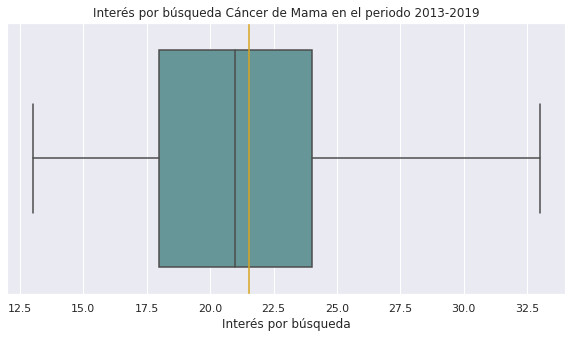

In [229]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_tema_filtrado['interes_en_cancer'], color='cadetblue')
plt.axvline (interes_tema_filtrado['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

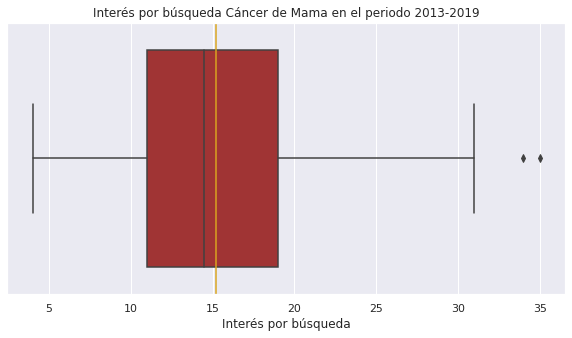

In [230]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_busqueda_filtrado['interes_en_cancer'], color='firebrick')
plt.axvline (interes_busqueda_filtrado['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Interés por búsqueda')
plt.title('Interés por búsqueda Cáncer de Mama en el periodo 2013-2019')

plt.show()

#### Con esto podemos ver que efectivamente la atención que se le da al problema es muy baja con respecto a ambas categorías. Con excepción, claro, al mes donde tiene más atención cada año.

#### para reforzar esta afirmación se procederá a realizar una tabla de frecuencias:

In [231]:
segmentos_busqueda = pd.cut(interes_busqueda['interes_en_cancer'], 10)
segmentos_busqueda.groupby(segmentos_busqueda).count()

interes_en_cancer
(3.904, 13.6]    36
(13.6, 23.2]     32
(23.2, 32.8]      6
(32.8, 42.4]      3
(42.4, 52.0]      2
(52.0, 61.6]      0
(61.6, 71.2]      1
(71.2, 80.8]      2
(80.8, 90.4]      0
(90.4, 100.0]     2
Name: interes_en_cancer, dtype: int64

In [232]:
segmentos_tema = pd.cut(interes_tema['interes_en_cancer'], 10)
segmentos_tema.groupby(segmentos_tema).count()

interes_en_cancer
(12.913, 21.7]    45
(21.7, 30.4]      27
(30.4, 39.1]       5
(39.1, 47.8]       0
(47.8, 56.5]       0
(56.5, 65.2]       0
(65.2, 73.9]       0
(73.9, 82.6]       1
(82.6, 91.3]       1
(91.3, 100.0]      5
Name: interes_en_cancer, dtype: int64

#### Donde podemos ver que la mayor parte del tiempo el interés en búsquedas de Google y el interés en Temas son muy bajos la mayor parte del tiempo.

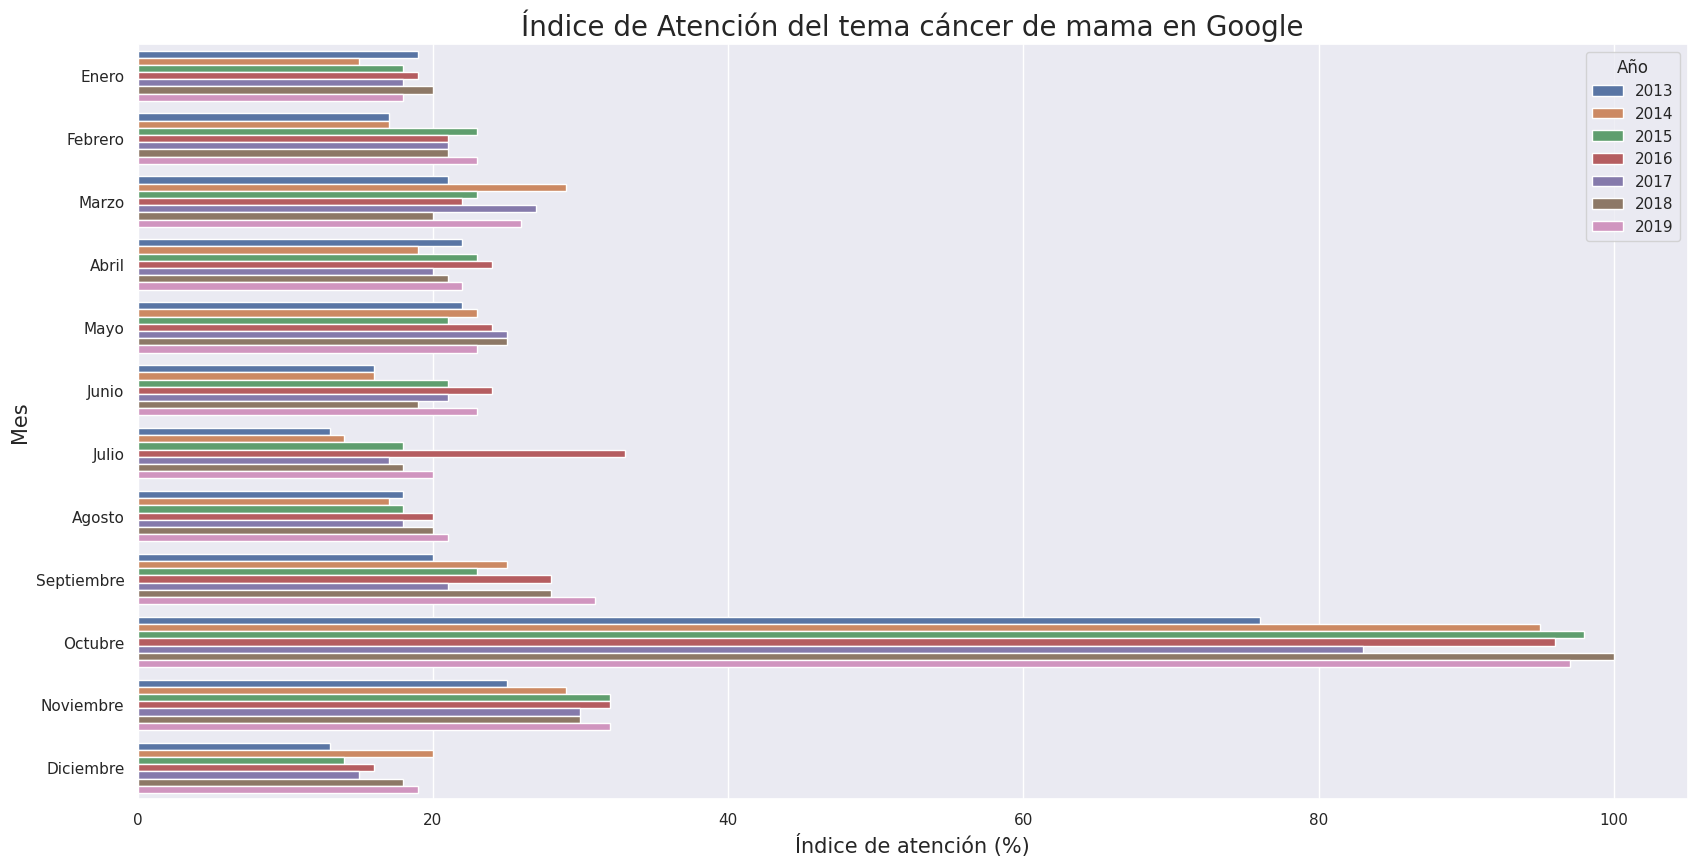

In [233]:
plt.figure(figsize=(20,10), dpi = 100)

ax = sns.barplot(x = interes_tema['interes_en_cancer'], y = interes_tema['mes'], hue ='year' , data = interes_tema ,orient='h')

plt.xlabel('Índice de atención (%)', fontsize = 15)
plt.ylabel('Mes', fontsize = 15)

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.yticks([i for i in range(0,12)], meses)

plt.title('Índice de Atención del tema cáncer de mama en Google', fontsize = 20)

ax.legend(title='Año')

plt.show()

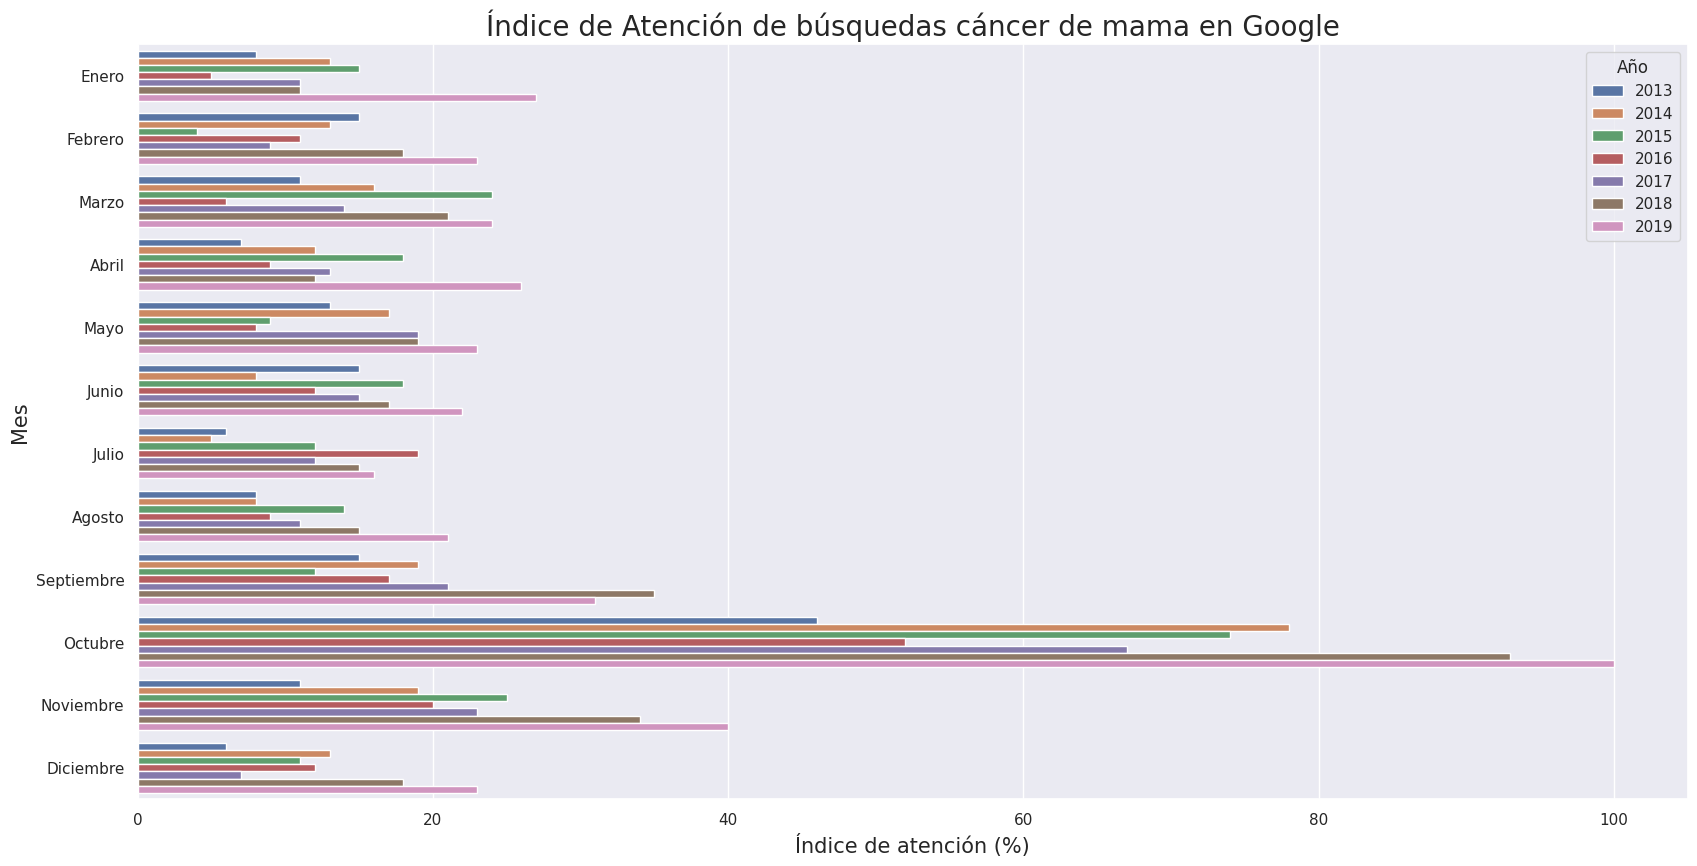

In [234]:
plt.figure(figsize=(20,10), dpi = 100)

ax = sns.barplot(x = interes_busqueda['interes_en_cancer'], y = interes_busqueda['mes'], hue ='year' , data = interes_busqueda ,orient='h')

plt.xlabel('Índice de atención (%)', fontsize = 15)
plt.ylabel('Mes', fontsize = 15)

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.yticks([i for i in range(0,12)], meses)

plt.title('Índice de Atención de búsquedas cáncer de mama en Google', fontsize = 20)

ax.legend(title='Año')

plt.show()

#### A partir de estas visualizaciones podemos ver que hay una carga inmediata de atención en el mes de Octubre, que es Octubre: Mes de Sensibilización sobre el Cáncer de Mama.

#### y esto en particular no representa un problema, de hecho nos dice que el labor que se realiza para sensiblizar y visibilizar el problema funciona, el problema es que fuera de este mes el problema se invisibiliza, ya que el índice de atención fuera de estos meses decae por debajo del 30%.

#### Ahora veo la relación entre las búsquedas realizadas por usuarios y el tema: 

In [235]:
#para esto primero hago un DF que tiene los datos que me interesan: 
interes_tema['interes_aspecto'] = ['tema' for i in range(len(interes_tema['fecha']))]
interes_busqueda['interes_aspecto'] = ['busqueda' for i in range(len(interes_busqueda['fecha']))]

interes = pd.concat([interes_busqueda, interes_tema])
interes = interes.rename(columns={'interes_en_cancer':'interes'})

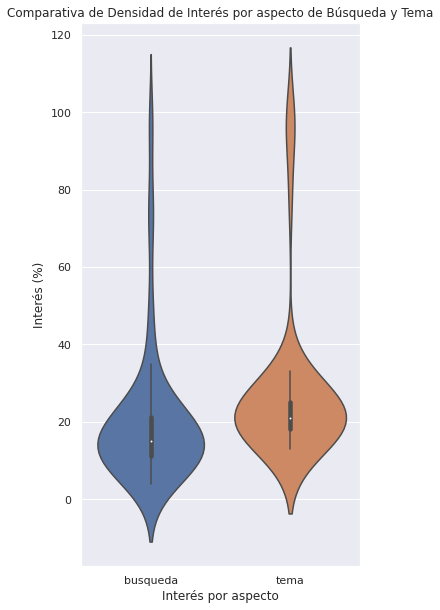

In [236]:
# realizo una visualización de los datos con respecto a la distribución de interes por tema e interes por búsqueda:

fig  = plt.figure(figsize = (5,10) )

sns.violinplot(data = interes, x = 'interes_aspecto', y = 'interes' )

plt.title('Comparativa de Densidad de Interés por aspecto de Búsqueda y Tema', fontsize = 12)
plt.xlabel('Interés por aspecto')
plt.ylabel('Interés (%)')

plt.show()

#### como podemos ver en la visualización ambas parecen estar cargadas hacía un bajo interés tanto por búsqueda como por tema, lo que en general nos da una idea de la importancia que se le ha dado en México a este creciente problema. 

#### Otro aspecto que resulta interesante estudiar es si el interés por tema, es decir, qué tanto se habla acerca del tema en la web, tiene relación con el interés de las búsquedas.

In [246]:
valores_tema = interes_tema['interes_en_cancer']
valores_busqueda = interes_busqueda['interes_en_cancer']

print(f"el coeficiente de pearson entre ambos intereses es: {(valores_tema.corr(valores_busqueda))}")

el coeficiente de pearson entre ambos intereses es: 0.8989676554293781


#### Como podemos ver parece ser que el qué tanto se hable acerca de un tema repercute directamente en qué tanto se realizan búsquedas al respecto. 

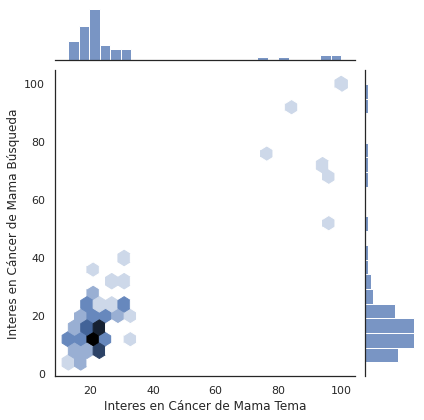

In [293]:
# realicemos una gráfica de dispersión: 
sns.set_style('white')
sns.jointplot(x = valores_tema, y = valores_busqueda, kind='hex')

plt.xlabel('Interes en Cáncer de Mama Tema')
plt.ylabel('Interes en Cáncer de Mama Búsqueda')

plt.show()

#### Donde podemos ver que la parte que tiene más peso dentro de la correlación es donde el interés es menor al 30% 

#### para ver qué tanta correlación entre ellos vamos a entrenar un modelo: 

In [312]:
#scikit-learn

from sklearn.linear_model import LinearRegression as LR

In [313]:
lr = LR()
lr.fit(valores_tema.to_frame(), valores_busqueda)

y_predict = lr.predict(valores_tema.to_frame())

In [314]:
y_predict = lr.predict(valores_tema.to_frame())

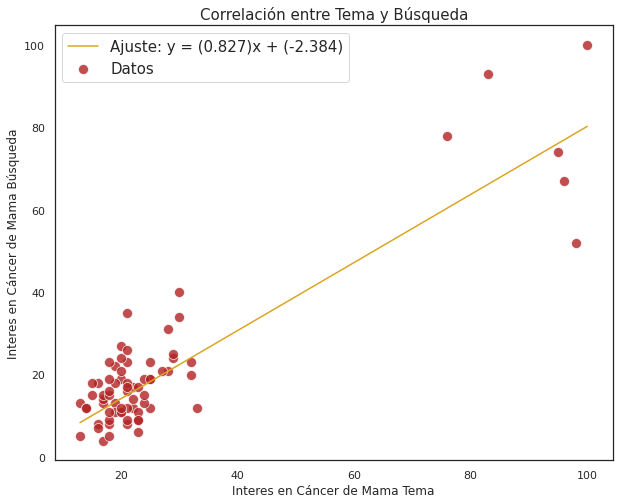

In [311]:
plt.figure(figsize=(10,8))

sns.scatterplot(x = valores_tema, y = valores_busqueda, color = 'firebrick', alpha = 0.8, s=100, label='Datos')
sns.lineplot(x = valores_tema,y = y_predict, color = 'goldenrod', alpha = 1.0, label=f'Ajuste: y = ({lr.coef_[0]:.3f})x + ({lr.intercept_:.3f})')

plt.xlabel('Interes en Cáncer de Mama Tema')
plt.ylabel('Interes en Cáncer de Mama Búsqueda')

plt.title('Correlación entre Tema y Búsqueda', fontsize = 15)

plt.legend(fontsize = 15)

plt.show()

#### Notemos que en este caso $R^2 = 0.89$, lo que dice que mi modelo puede predecir bien datos, sin embargo, al realizar la regresión con todos los datos podría haber una posibilidad de que mi modelo solo fuera bueno prediciendo los datos existentes dentro de mi DS.

#### Para demostrar la validez de mi modelo, lo someteré a una evaluación nuevamente, esta vez con un DS de entrenamiento y uno de prueba:



In [333]:
from sklearn.model_selection import train_test_split

In [334]:
# nuevamente introduzco los valores, de los cuales quiero demostrar una correlación
X = valores_tema
Y = valores_busqueda

In [335]:
from sklearn.linear_model import LinearRegression

In [336]:
#entreno con el 30% de los datos:
X_training, X_test, Y_training, Y_test = train_test_split(X.to_frame(),Y,test_size = 0.3, shuffle = True)

In [337]:
lr = LinearRegression()
lr.fit(X_training, Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
print(f"R^2 = {lr.score(X_test, Y_test):.3f}")

R^2 = 0.843


#### Notemos que en ambos casos el poder predictivo del modelo es alto, ya que $R^2 = 0.84$. Esto nos indica que cuando hay un tema en tendencia los usuarios tienden a buscar más información al respecto, en nuestro caso específico, a cerca del cáncer de mama. 